<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - MVP - Saymon Reis
## Classificação de Animais conforme caracteristicas selecionadas

## Configuração do ambiente

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

O dataset descreve características de diversos animais com base em 16 atributos e uma coluna de classe que categoriza os animais em sete diferentes tipos. Cada instância do dataset representa um animal específico, identificado por seu nome único. A seguir, estão as descrições das colunas do dataset:

Descrição de Cada Coluna:
- animal name: Nome único para cada animal.
- hair: Indica se o animal possui pelos (Booleano).
- feathers: Indica se o animal possui penas (Booleano).
- eggs: Indica se o animal põe ovos (Booleano).
- milk: Indica se o animal produz leite (Booleano).
- airborne: Indica se o animal pode voar (Booleano).
- aquatic: Indica se o animal vive na água (Booleano).
- predator: Indica se o animal é predador (Booleano).
- toothed: Indica se o animal tem dentes (Booleano).
- backbone: Indica se o animal possui espinha dorsal (Booleano).
- breathes: Indica se o animal respira (Booleano).
- venomous: Indica se o animal é venenoso (Booleano).
- fins: Indica se o animal possui nadadeiras (Booleano).
- legs: Número de pernas do animal (Valores possíveis: 0, 2, 4, 5, 6, 8).
- tail: Indica se o animal possui cauda (Booleano).
- domestic: Indica se o animal é domesticado (Booleano).
- catsize: Indica se o animal é de porte semelhante ao de um gato (Booleano).
- type: Atributo de classe que categoriza os animais em sete grupos distintos, representados por valores inteiros de 1 a 7.

### Classes de Animais:
O atributo type classifica os animais em sete grupos diferentes, conforme descrito abaixo:

- Tipo 1: Mamíferos (41 animais) - Porco-da-terra, antílope, urso, javali, búfalo, bezerro, porquinho-da-índia, guepardo, veado, golfinho, elefante, morcego frugívoro, girafa, menina, cabra, gorila, hamster, lebre, leopardo, leão, lince, vison, toupeira, mangusto, gambá, órix, ornitorrinco, furão, pônei, boto, puma, gato doméstico, guaxinim, rena, foca, leão-marinho, esquilo, morcego-vampiro, toupeira, wallaby, lobo.

- Tipo 2: Aves (20 animais) - Galinha, corvo, pomba, pato, flamingo, gaivota, falcão, kiwi, cotovia, avestruz, periquito, pinguim, faisão, ema, andorinha-do-mar, skua, pardal, cisne, abutre, carriça.

- Tipo 3: Répteis (5 animais) - Víbora, serpente-marinha, licranço, tartaruga, tuatara.

- Tipo 4: Peixes (13 animais) - Robalo, carpa, bagre, cabeçudo, cação, haddock (peixe similar ao bacalhau), arenque, lúcio, piranha, cavalo-marinho, linguado, arraia, atum.

- Tipo 5: Anfíbios (4 animais) - Rã, rã, tritão, sapo.

- Tipo 6: Insetos (8 animais) - Pulga, mosquito, abelha, mosca doméstica, joaninha, mariposa, cupim, vespa.

- Tipo 7: Invertebrados (10 animais) - Amêijoa, caranguejo, lagostim, lagosta, polvo, escorpião, vespa-do-mar, lesma, estrela-do-mar, verme.

###Objetivo:
O objetivo desse dataset é classificar animais em diferentes tipos com base em suas características físicas e comportamentais, usando modelos de aprendizado de máquina para prever o type de cada animal com base em seus 17 atributos booleanos e numéricos. Isso pode ajudar na categorização de novos animais e na compreensão de suas semelhanças com os já conhecidos.

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/SaymonReisGit/ZooDataSet/refs/heads/main/dataset_zoo.csv" #Importar csv

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [4]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.937500 (0.062500)
KNN: 0.837500 (0.137500)
CART: 0.962500 (0.057282)
NB: 0.975000 (0.050000)
SVM: 0.900000 (0.075000)
Bagging: 0.950000 (0.082916)
RF: 0.950000 (0.061237)
ET: 0.950000 (0.061237)
Ada: 0.737500 (0.103833)
GB: 0.912500 (0.112500)
Voting: 0.937500 (0.062500)


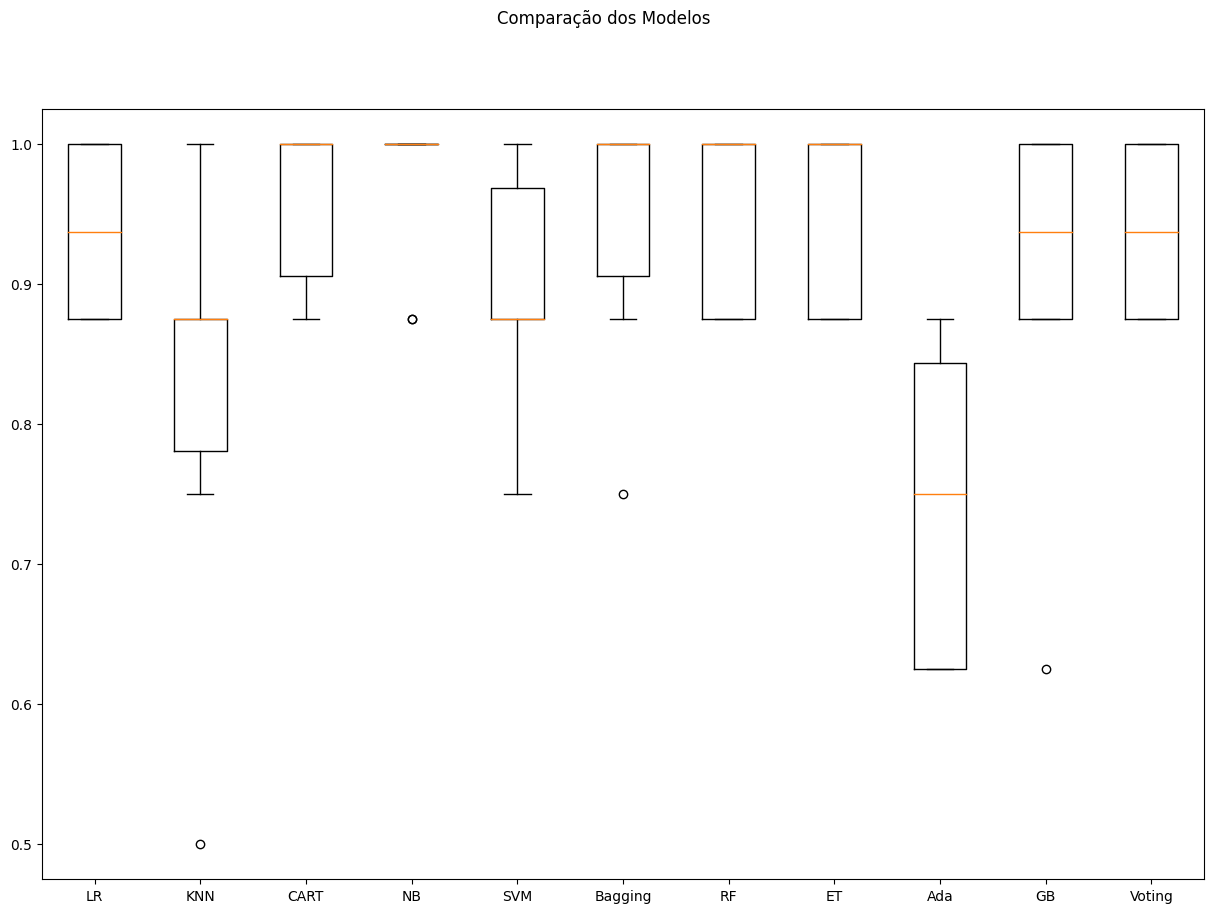

In [5]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$


onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

LR-orig: 0.938 (0.062)
KNN-orig: 0.838 (0.138)
CART-orig: 0.963 (0.057)
NB-orig: 0.975 (0.050)
SVM-orig: 0.900 (0.075)
Bag-orig: 0.950 (0.083)
RF-orig: 0.950 (0.061)
ET-orig: 0.950 (0.061)
Ada-orig: 0.738 (0.104)
GB-orig: 0.912 (0.113)
Vot-orig: 0.938 (0.062)
LR-padr: 0.950 (0.061)
KNN-padr: 0.900 (0.075)
CART-padr: 0.938 (0.084)
NB-padr: 0.950 (0.083)
SVM-padr: 0.925 (0.100)
Bag-padr: 0.963 (0.057)
RF-padr: 0.950 (0.061)
ET-padr: 0.950 (0.061)
Ada-padr: 0.738 (0.104)
GB-padr: 0.912 (0.113)
Vot-padr: 0.950 (0.061)
LR-norm: 0.950 (0.061)
KNN-norm: 0.925 (0.083)
CART-norm: 0.950 (0.061)
NB-norm: 0.975 (0.050)
SVM-norm: 0.938 (0.084)
Bag-norm: 0.950 (0.083)
RF-norm: 0.963 (0.057)
ET-norm: 0.950 (0.061)
Ada-norm: 0.738 (0.104)
GB-norm: 0.912 (0.113)
Vot-norm: 0.950 (0.061)


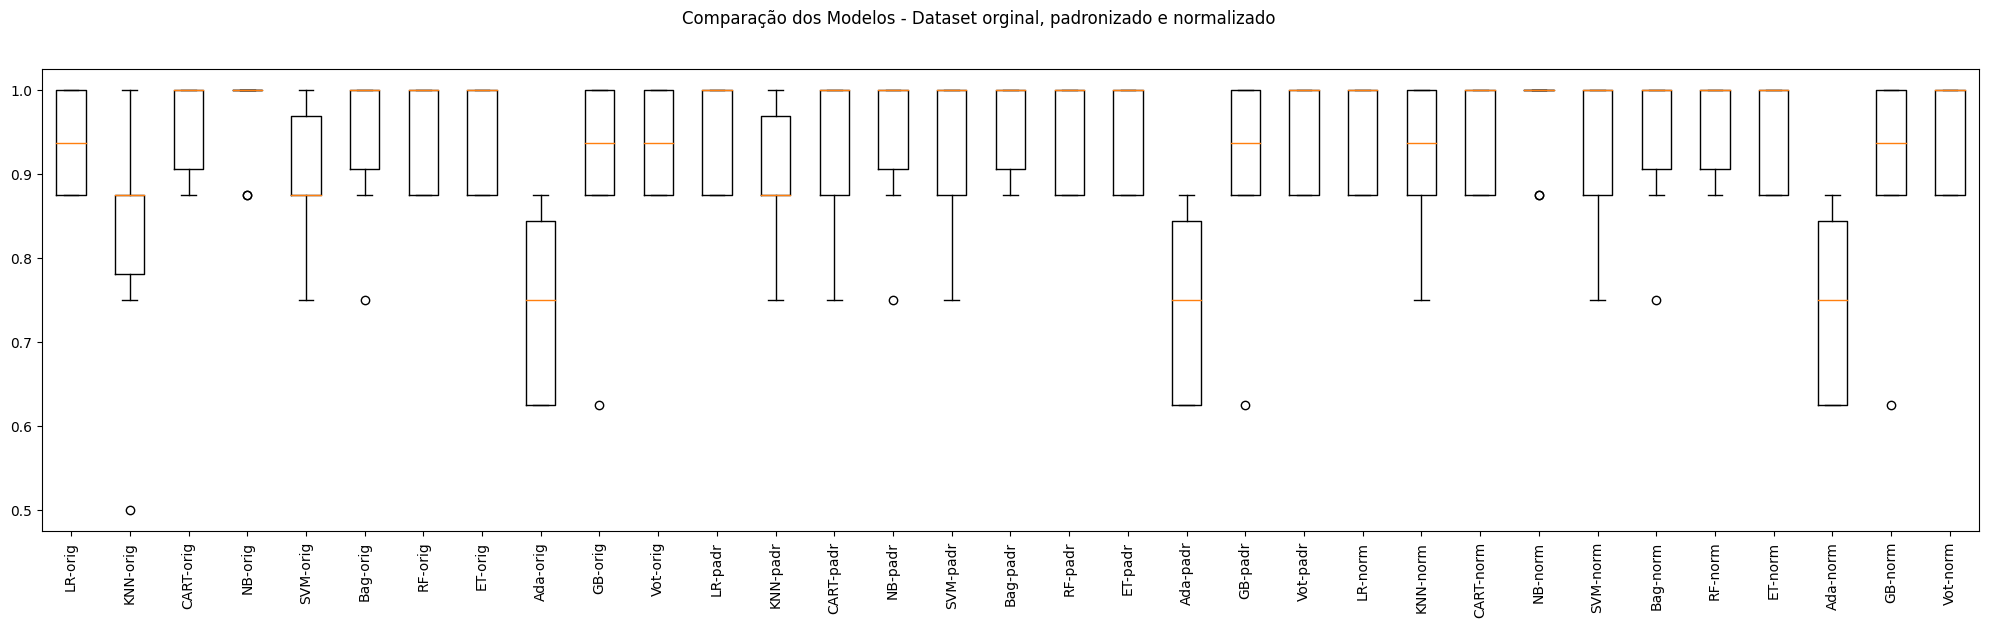

In [6]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [7]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

#It took 53min


Modelo: LR-orig - Melhor: 0.975000 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.975000 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.962500 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.962500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Modelo: KNN-padr - Melhor: 0.962500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Modelo: KNN-norm - Melhor: 0.950000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Modelo: CART-orig - Melhor: 0.975000 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
Modelo: CART-padr - Melhor: 0.987500 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
Modelo: CART-norm - Melhor: 0.975000 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
Modelo: NB-orig - Melhor: 0.962500 usando {'NB__var_smoothing': 1e-09}
Modelo: N

In [8]:
# Modelo: LR-orig - Melhor: 0.975000 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
# Modelo: LR-padr - Melhor: 0.975000 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
# Modelo: LR-norm - Melhor: 0.962500 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
# Modelo: KNN-orig - Melhor: 0.962500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
# Modelo: KNN-padr - Melhor: 0.962500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
# Modelo: KNN-norm - Melhor: 0.950000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
# Modelo: CART-orig - Melhor: 0.975000 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
# Modelo: CART-padr - Melhor: 0.987500 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
# Modelo: CART-norm - Melhor: 0.975000 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
# Modelo: NB-orig - Melhor: 0.962500 usando {'NB__var_smoothing': 1e-09}
# Modelo: NB-padr - Melhor: 0.950000 usando {'NB__var_smoothing': 1e-09}
# Modelo: NB-norm - Melhor: 0.962500 usando {'NB__var_smoothing': 1e-09}
# Modelo: SVM-orig - Melhor: 0.975000 usando {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: SVM-padr - Melhor: 0.975000 usando {'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
# Modelo: SVM-norm - Melhor: 0.975000 usando {'SVM__C': 1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
# Modelo: Bagging-orig - Melhor: 0.962500 usando {}
# Modelo: Bagging-padr - Melhor: 0.962500 usando {}
# Modelo: Bagging-norm - Melhor: 0.975000 usando {}
# Modelo: RF-orig - Melhor: 0.975000 usando {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 50}
# Modelo: RF-padr - Melhor: 0.975000 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 100}
# Modelo: RF-norm - Melhor: 0.987500 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
# Modelo: ET-orig - Melhor: 0.987500 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 2, 'ET__n_estimators': 50}
# Modelo: ET-padr - Melhor: 0.987500 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 5, 'ET__n_estimators': 200}
# Modelo: ET-norm - Melhor: 0.987500 usando {'ET__max_depth': 10, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}
# Modelo: Ada-orig - Melhor: 0.912500 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 10}
# Modelo: Ada-padr - Melhor: 0.912500 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 10}
# Modelo: Ada-norm - Melhor: 0.912500 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 10}
# Modelo: GB-orig - Melhor: 0.962500 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 200}
# Modelo: GB-padr - Melhor: 0.962500 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 50}
# Modelo: GB-norm - Melhor: 0.962500 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 50}
# Modelo: Voting-orig - Melhor: 0.950000 usando {}
# Modelo: Voting-padr - Melhor: 0.950000 usando {}
# Modelo: Voting-norm - Melhor: 0.950000 usando {}

In [9]:
# Tuning do ET

np.random.seed(7) # definindo uma semente global para este bloco

num_trees = 100
max_features = 3

pipelines = []

# Definindo os componentes do pipeline
et = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ET-orig', Pipeline(steps=[et])))
pipelines.append(('ET-padr', Pipeline(steps=[standard_scaler, et])))
pipelines.append(('ET-norm', Pipeline(steps=[min_max_scaler, et])))

param_grid = {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: ET-orig - Melhor: 1.000000 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 10}
Sem tratamento de missings: ET-padr - Melhor: 0.987500 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 10}
Sem tratamento de missings: ET-norm - Melhor: 0.987500 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 5, 'ET__n_estimators': 200}


## Finalização do Modelo

In [10]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# # Modelo: ET-norm - Melhor: 0.987500 usando {'ET__max_depth': 10, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}

np.random.seed(7)

# Preparação do modelo
#scaler = MinMaxScaler().fit()
#rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = ExtraTreesClassifier(max_depth=20,
                                  max_features='sqrt',
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=10)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
#rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9523809523809523


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [11]:
np.random.seed(7)

model = ExtraTreesClassifier(max_depth=20,
                                  max_features='sqrt',
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=10)

pipeline = Pipeline(steps=[('ET', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9523809523809523


## Salvando os arquivos

In [13]:
# Salvando o modelo
model_filename = 'et_zoo_classifier.pkl'
with open("/content/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
# scaler_filename = 'minmax_scaler_zoo.pkl'
# with open("/content/"+scaler_filename, 'wb') as file:
#     pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'et_zoo_pipeline.pkl'
with open("/content/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("/content/X_test_dataset_zoo.csv", index=False)
y_test_df.to_csv("/content/y_test_dataset_zoo.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [14]:
# Preparação do modelo com TODO o dataset
#scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
#rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(X, y)

ExtraTreesClassifier(max_depth=20, n_estimators=10)

In [15]:
# Novos dados - não sabemos a classe!
data = {
        'hair': [0, 1, 0],
        'feathers': [1 , 0, 0],
        'eggs': [1 , 0, 0],
        'milk': [0 , 1, 0],
        'airborne': [0 , 0, 1],
        'aquatic': [0 , 0, 1],
        'predator': [0, 0, 1],
        'toothed': [0, 1, 0],
        'backbone': [1 , 1, 1],
        'breathes': [1 ,1, 0],
        'venomous': [0 , 0, 0],
        'fins': [0 , 0, 1],
        'legs': [2, 4, 0],
        'tail': [1 , 1, 0],
        'domestic': [0 , 0, 0],
        'catsize': [1 , 0, 0]
      }
atributos = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:16].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
#rescaledEntradaX = scaler.transform(X_entrada)
print(X_entrada)

[[0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]]


In [16]:
# Predição de classes dos dados de entrada
saidas = model.predict(X_entrada)
print(saidas)

[2 1 7]
